In [1]:
# Data processing
import pandas as pd
import numpy as np
import scipy.stats
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow_recommenders as tfrs


# Visualization
import seaborn as sb

# Similarity
from sklearn.metrics.pairwise import cosine_similarity

# Other
import math
import random
import sklearn
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

c:\Users\jljoa\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\jljoa\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\jljoa\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
ratings = pd.read_csv("../archive/rating_complete.csv")
ratings

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9
...,...,...,...
57633273,353404,502,8
57633274,353404,987,4
57633275,353404,225,8
57633276,353404,243,7


In [3]:
anime_df = pd.read_csv("../archive/anime.csv")
anime_df["anime_id"] = anime_df["MAL_ID"]
anime_df

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,anime_id
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,5
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,6
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,7
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,48481
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,48483
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,48488
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,48491


In [4]:
df = pd.merge(ratings, anime_df[['anime_id','Name', 'Genres']], on="anime_id", how="inner")
df

,user_id,anime_id,rating,Name,Genres
0,0,430,9,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
1,6,430,8,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
2,18,430,10,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
3,19,430,8,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
4,33,430,4,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
...,...,...,...,...,...
57633273,315549,38853,1,Ex-Arm,"Action, Sci-Fi, Ecchi, Seinen"
57633274,350024,38853,10,Ex-Arm,"Action, Sci-Fi, Ecchi, Seinen"
57633275,311855,39435,6,Oshiri Tantei Movie 1: Curry Naru Jiken,"Mystery, Comedy, Kids, Fantasy"
57633276,334473,35746,4,6 Lovers,"Comedy, Drama, Romance, School, Shounen Ai, Sl..."


# Data Preparation
* 57,633,278 rows are to many entries to compute, let's reduce the dataset

In [5]:
# User ratings
print(df["user_id"].value_counts().mean())
df["user_id"].value_counts()

185.87842313882197


189037    15455
162615    14864
68042     13462
283786    12778
259790     9996
          ...  
136422        1
213994        1
196985        1
190834        1
206653        1
Name: user_id, Length: 310059, dtype: int64

In [6]:
# Anime ratings
print(df["anime_id"].value_counts().mean())
df["anime_id"].value_counts()

3415.912636320531


1535     182375
16498    169794
11757    161192
6547     141127
30276    138924
          ...  
39686         1
39685         1
35153         1
40594         1
39627         1
Name: anime_id, Length: 16872, dtype: int64

In [7]:
# We are left still with 38,616,425 entries even after filtering out users and animes
# so let's sample the remaining dataset so we get a smaller one

df_sample = df.sample(frac=0.05)
df_sample # 34622 entries seems more logical for first runs so we can re-run faster

,user_id,anime_id,rating,Name,Genres
27718614,194789,4581,8,Shikabane Hime: Aka,"Action, Horror, Supernatural, Shounen"
30130524,178637,1536,8,Busou Renkin,"Action, Fantasy, Supernatural, Comedy, School,..."
24165613,263959,11759,5,Accel World,"Action, Game, Sci-Fi, Romance, School"
42625141,22678,18195,9,Little Busters!: Refrain,"Slice of Life, Comedy, Supernatural, Drama, Ro..."
31568973,232206,4382,7,Suzumiya Haruhi no Yuuutsu (2009),"Comedy, Mystery, Parody, Romance, School, Sci-..."
...,...,...,...,...,...
36733637,76568,13469,7,Hyouka: Motsubeki Mono wa,"Mystery, School, Slice of Life"
28413901,38409,225,6,Dragon Ball GT,"Action, Sci-Fi, Adventure, Comedy, Super Power..."
52948014,138130,6330,5,Shakugan no Shana: Friagne & Marianne no Naze ...,"Comedy, Supernatural, Fantasy"
12545520,281182,6880,8,Deadman Wonderland,"Action, Horror, Sci-Fi, Shounen, Supernatural"


In [8]:
# df.info()
# User ratings
print("USERS \n")
print(df_sample["user_id"].value_counts().mean())
print(df_sample["user_id"].value_counts())
print("\n")

print("ANIMES \n")
# Anime ratings
print(df_sample["anime_id"].value_counts().mean())
print(df_sample["anime_id"].value_counts())

USERS 

10.698148581271973
189037    759
162615    720
68042     670
283786    651
259790    491
         ... 
242423      1
126438      1
180156      1
109070      1
71975       1
Name: user_id, Length: 269361, dtype: int64


ANIMES 

195.56593145571767
1535     9027
16498    8470
11757    8220
6547     7115
30276    6899
         ... 
33084       1
7633        1
28371       1
29752       1
42014       1
Name: anime_id, Length: 14735, dtype: int64


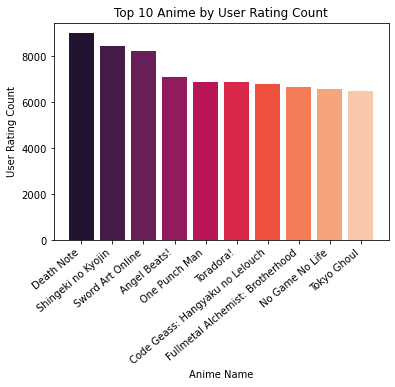

In [9]:
# Data Visualization
import matplotlib.pyplot as plt

# Count the number of occurrences of each anime name
top_10_anime = df_sample['Name'].value_counts().nlargest(10)
palette = sb.color_palette('rocket', len(top_10_anime))
# Create the bar chart
plt.bar(top_10_anime.index, top_10_anime.values, color=palette)

# Set the title and labels
plt.title('Top 10 Anime by User Rating Count')
plt.xlabel('Anime Name')
plt.ylabel('User Rating Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=40, ha="right")

# Show the plot
plt.show()

In [10]:
# Filter out users with less than 150 ratings and animes with less than 3500 ratings
df_sample_anime = df_sample.groupby("anime_id").filter(lambda x: len(x) > 2000) # 16872
df_sample_anime

,user_id,anime_id,rating,Name,Genres
24165613,263959,11759,5,Accel World,"Action, Game, Sci-Fi, Romance, School"
31568973,232206,4382,7,Suzumiya Haruhi no Yuuutsu (2009),"Comedy, Mystery, Parody, Romance, School, Sci-..."
6025240,151372,14749,10,Ore no Kanojo to Osananajimi ga Shuraba Sugiru,"Comedy, Harem, Romance, School"
4279699,222738,23273,9,Shigatsu wa Kimi no Uso,"Drama, Music, Romance, School, Shounen"
24592096,294469,2966,7,Ookami to Koushinryou,"Adventure, Fantasy, Historical, Romance"
...,...,...,...,...,...
8551844,184191,15451,8,High School DxD New,"Action, Harem, Comedy, Demons, Romance, Ecchi,..."
4271377,191969,23273,10,Shigatsu wa Kimi no Uso,"Drama, Music, Romance, School, Shounen"
28413901,38409,225,6,Dragon Ball GT,"Action, Sci-Fi, Adventure, Comedy, Super Power..."
12545520,281182,6880,8,Deadman Wonderland,"Action, Horror, Sci-Fi, Shounen, Supernatural"


In [11]:
df_sample_users = df_sample_anime.groupby("user_id").filter(lambda x: len(x) > 15) # 310059
df_sample_users

,user_id,anime_id,rating,Name,Genres
15400253,271500,1519,9,Black Lagoon: The Second Barrage,"Action, Seinen"
10640460,352192,17074,8,Monogatari Series: Second Season,"Mystery, Comedy, Supernatural, Romance, Vampire"
7331632,142138,32182,8,Mob Psycho 100,"Action, Slice of Life, Comedy, Supernatural"
17352605,211142,11617,7,High School DxD,"Comedy, Demons, Ecchi, Harem, Romance, School"
16444256,331665,8841,7,Kore wa Zombie Desu ka?,"Action, Comedy, Ecchi, Harem, Magic, Supernatural"
...,...,...,...,...,...
1058640,64925,22535,9,Kiseijuu: Sei no Kakuritsu,"Action, Sci-Fi, Horror, Psychological, Drama, ..."
2024736,99775,34599,9,Made in Abyss,"Sci-Fi, Adventure, Mystery, Drama, Fantasy"
11985694,173670,8769,7,Ore no Imouto ga Konnani Kawaii Wake ga Nai,"Slice of Life, Comedy"
3411906,168341,1575,10,Code Geass: Hangyaku no Lelouch,"Action, Military, Sci-Fi, Super Power, Drama, ..."


In [12]:
# User ratings
print("USERS \n")
print(df_sample_users["user_id"].value_counts().mean())
print(df_sample_users["user_id"].value_counts().head())
print("\n")

print("ANIMES \n")
# Anime ratings
print(df_sample_users["anime_id"].value_counts().mean())
print(df_sample_users["anime_id"].value_counts().head())

USERS 

17.248025276461295
271500    25
282896    24
172855    23
327128    23
106395    23
Name: user_id, dtype: int64


ANIMES 

38.579505300353354
11741    65
4654     64
11757    63
28171    62
22319    61
Name: anime_id, dtype: int64


In [13]:
df_sample = df_sample_users

# Join anime_df titles to df_strings
df_strings = df_sample.drop(columns={'anime_id', 'Genres'})
df_strings = df_strings.astype(str)
df_strings = df_strings.astype({'rating': 'float32'})
df_strings

,user_id,rating,Name
15400253,271500,9.0,Black Lagoon: The Second Barrage
10640460,352192,8.0,Monogatari Series: Second Season
7331632,142138,8.0,Mob Psycho 100
17352605,211142,7.0,High School DxD
16444256,331665,7.0,Kore wa Zombie Desu ka?
...,...,...,...
1058640,64925,9.0,Kiseijuu: Sei no Kakuritsu
2024736,99775,9.0,Made in Abyss
11985694,173670,7.0,Ore no Imouto ga Konnani Kawaii Wake ga Nai
3411906,168341,10.0,Code Geass: Hangyaku no Lelouch


# Evaluation
Divide df into training and test set (80 - 20)

## Model Evaluators


In [14]:
train_df, test_df = train_test_split(df_sample.drop(columns={"Name","Genres"}),
                                #    stratify=df_sample['user_id'], 
                                   test_size=0.20,
                                   random_state=42)

print('# ratings on Train set: %d' % len(train_df))
print('# ratings on Test set: %d' % len(test_df))
train_df

# ratings on Train set: 8734
# ratings on Test set: 2184


,user_id,anime_id,rating
8157179,195141,226,7
7534968,304833,11499,9
3869780,329827,37349,7
32420185,76674,13125,10
18603038,273235,6045,8
...,...,...,...
5841488,67400,30276,10
25315349,230862,6347,7
2043508,213193,34599,8
25837118,277868,1887,7


In [15]:
train_df_str, test_df_str = train_test_split(df_strings,
                                #    stratify=df_sample['user_id'], 
                                   test_size=0.20,
                                   random_state=42)

print('# ratings on Train set: %d' % len(train_df_str))
print('# ratings on Test set: %d' % len(test_df_str))
train_df_str

# ratings on Train set: 8734
# ratings on Test set: 2184


,user_id,rating,Name
8157179,195141,7.0,Elfen Lied
7534968,304833,9.0,Sankarea
3869780,329827,7.0,Goblin Slayer
32420185,76674,10.0,Shinsekai yori
18603038,273235,8.0,Kimi ni Todoke
...,...,...,...
5841488,67400,10.0,One Punch Man
25315349,230862,7.0,Baka to Test to Shoukanjuu
2043508,213193,8.0,Made in Abyss
25837118,277868,7.0,Lucky☆Star


In Recommender Systems, there are a set metrics commonly used for evaluation. We chose to work with Top-N accuracy metrics, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.
This evaluation method works as follows:

* For each user
    * For each item the user has interacted in test set
        * Sample 100 other items the user has never interacted.
            
            Ps: Here we naively assume those non interacted items are not relevant to the user, which might not be true, as the user may simply not be aware of those not interacted items. But let's keep this assumption.
        * Ask the recommender model to produce a ranked list of recommended items, from a set composed one interacted item and the 100 non-interacted ("non-relevant!) items
        * Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
* Aggregate the global Top-N accuracy metrics

### For anime_id (int)

In [16]:
#Indexing by personId to speed up the searches during evaluation
indexed_df = df_sample.set_index('user_id')
train_indexed_df = train_df.set_index('user_id')
test_indexed_df = test_df.set_index('user_id')

In [17]:
def get_items_interacted(person_id, interactions_df):
    # Get the user's data and merge in the movie information.

    if person_id in interactions_df.index :
        interacted_items = interactions_df.loc[person_id]['anime_id']
    else:
        return []
    
    # print(interacted_items.head(1))
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [18]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:


    def get_not_interacted_items_sample(self, person_id, sample_size, seed=42):
        interacted_items = get_items_interacted(person_id, indexed_df)
        all_items = set(test_indexed_df['anime_id'])
        non_interacted_items = all_items - interacted_items
        
        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    def evaluate_model_for_user(self, model, person_id):
        #Getting the items in test set
        interacted_values_testset = test_indexed_df.loc[person_id]
        if type(interacted_values_testset['anime_id']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['anime_id'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['anime_id'])])  
        interacted_items_count_testset = len(person_interacted_items_testset) 

        #Getting a ranked recommendation list from a model for a given user
        person_recs_df = model.recommend_items(person_id, 
                                               items_to_ignore=get_items_interacted(person_id, 
                                                                                    train_indexed_df), 
                                               topn=10000000000)
        
        # print(person_recs_df.head(5))
        hits_at_5_count = 0
        hits_at_10_count = 0

        #For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            #Getting a random sample (100) items the user has not interacted 
            #(to represent items that are assumed to be no relevant to the user)
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, 
                                                                          sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, 
                                                                          seed=item_id%(2**32))
            #Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            #Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['anime_id'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['anime_id'].values
            # print recommendation df length, items to filter length and valid recs length
            # print(len(person_recs_df), len(items_to_filter_recs), len(valid_recs))

            #Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        #Recall is the rate of the interacted items that are ranked among the Top-N recommended items, 
        #when mixed with a set of non-relevant items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)
        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        # ADEDEDEDEDD
        # print(person_metrics)
        return person_metrics

    def evaluate_model(self, model):
        #print('Running evaluation for users')
        people_metrics = []
        for idx, person_id in enumerate(list(test_indexed_df.index.unique().values)):
            if idx % 100 == 0 and idx > 0:
               print('%d users processed' % idx)
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['user_id'] = person_id
            people_metrics.append(person_metrics)
            # if(idx > 15):
            #     break
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics) \
                            .sort_values('interacted_count', ascending=False)
            
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()    

### For anime Title (string)

In [19]:
#Indexing by personId to speed up the searches during evaluation
indexed_df_str = df_strings.set_index('user_id')
train_indexed_df_str = train_df_str.set_index('user_id')
test_indexed_df_str = test_df_str.set_index('user_id')

In [20]:
def get_items_interacted_str(person_id, interactions_df):
    # Get the user's data and merge in the movie information.
    if person_id in interactions_df.index :
        interacted_items = interactions_df.loc[person_id]['Name']
    else:
        return []
    
    # print(interacted_items.head(1))
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [21]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator_str:


    def get_not_interacted_items_sample(self, person_id, sample_size, seed=42):
        interacted_items = get_items_interacted_str(person_id, indexed_df_str)
        all_items = set(indexed_df_str['Name'])
        non_interacted_items = all_items - interacted_items
        
        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    def evaluate_model_for_user(self, model, person_id):
        #Getting the items in test set
        interacted_values_testset = test_indexed_df_str.loc[person_id]
        if type(interacted_values_testset['Name']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['Name'])
        else:
            person_interacted_items_testset = set([interacted_values_testset['Name']])  
        
        # print(person_interacted_items_testset)
        interacted_items_count_testset = len(person_interacted_items_testset) 
        #Getting a ranked recommendation list from a model for a given user
        person_recs_df = model.recommend_items(person_id, 
                                               items_to_ignore=get_items_interacted_str(person_id, 
                                                                                    train_indexed_df_str), 
                                               topn=10000000000)
        hits_at_5_count = 0
        hits_at_10_count = 0

        #For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            #Getting a random sample (100) items the user has not interacted 
            #(to represent items that are assumed to be no relevant to the user)
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id,
                                                                          sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS 
                                                                          )

            #Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            #Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['Name'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['Name'].values
            #Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        #Recall is the rate of the interacted items that are ranked among the Top-N recommended items, 
        #when mixed with a set of non-relevant items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)
        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        # ADEDEDEDEDD
        # print(person_metrics)
        return person_metrics

    def evaluate_model(self, model):
        #print('Running evaluation for users')
        people_metrics = []
        for idx, person_id in enumerate(list(test_indexed_df_str.index.unique().values)):
            if idx % 100 == 0 and idx > 0:
               print('%d users processed' % idx)
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['user_id'] = person_id
            people_metrics.append(person_metrics)
            # if(idx > 15):
            #     break
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics) \
                            .sort_values('interacted_count', ascending=False)
            
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator_str = ModelEvaluator_str()    

## Popularity model

In [22]:
#Computes the most popular items
item_popularity_df = indexed_df.groupby('anime_id')['rating'].sum().sort_values(ascending=False).reset_index()
item_popularity_df.head(10)

,anime_id,rating
0,11741,569
1,9253,552
2,30276,530
3,28171,512
4,1535,511
5,23273,506
6,4654,490
7,32281,462
8,30,459
9,6547,456


In [23]:
class PopularityRecommender:
    
    MODEL_NAME = 'Popularity'
    
    def __init__(self, popularity_df, items_df=None):
        self.popularity_df = popularity_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Recommend the more popular items that the user hasn't seen yet.
        recommendations_df = self.popularity_df[~self.popularity_df['anime_id'].isin(items_to_ignore)] \
                               .sort_values('rating', ascending = False) \
                               .head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')
    
            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'anime_id', 
                                                          right_on = 'anime_id')[['rating']]


        return recommendations_df
    
popularity_model = PopularityRecommender(item_popularity_df, indexed_df)

In [24]:
# RUN POPULARITY MODEL

# import warnings
# warnings.filterwarnings('ignore')
# print('Evaluating Popularity recommendation model... (', len(test_indexed_df.value_counts()), ' users )')
# pop_global_metrics, pop_detailed_results_df = model_evaluator.evaluate_model(popularity_model)
# print('\nGlobal metrics:\n%s' % pop_global_metrics)
# pop_detailed_results_df.head(10)

## Collaborative Filtering
* For matrix factorization we use Singular Value Decomposition (SVD)
* Cosine similarity between users
* 

### Singular Value Decmposition Matrix Factorization


In [25]:
# User-item matrix (users as rows, anime as columns)
# print(train_df)
user_anime_df = train_df.pivot(index='user_id', columns='anime_id', values='rating').fillna(0)
user_anime_df.head()

anime_id,1,6,20,30,32,43,47,59,71,120,...,37450,37510,37675,37779,37999,38000,38408,38524,38691,40591
user_id,,,,,,,,,,,,,,,,,,,,,
406,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
792,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
2814,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3227,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3440,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
user_anime_matrix = user_anime_df.values
user_anime_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 4., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 7., 0., ..., 8., 0., 0.],
       [0., 0., 0., ..., 0., 8., 0.]])

In [27]:
users_ids = list(user_anime_df.index)
users_ids[:10]

[406, 792, 2814, 3227, 3440, 4424, 4773, 5213, 5267, 6399]

In [28]:
user_anime_matrix_sparse = csr_matrix(user_anime_matrix)
user_anime_matrix_sparse

<633x283 sparse matrix of type '<class 'numpy.float64'>'
	with 8734 stored elements in Compressed Sparse Row format>

In [29]:
#The number of factors to factor the user-anime matrix.
NUMBER_OF_FACTORS_MF = 15
#Performs matrix factorization of the original user anime matrix
U, sigma, Vt = svds(user_anime_matrix_sparse, k = NUMBER_OF_FACTORS_MF)
sigma = np.diag(sigma)
user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

print("U shape - ",U.shape, "\n Vt shape - ", Vt.shape, "\nsigma shape - ", sigma.shape, "\n", user_predicted_ratings)


U shape -  (633, 15) 
 Vt shape -  (15, 283) 
sigma shape -  (15, 15) 
 [[ 8.47938402e-01  1.18777451e+00  2.31014170e+00 ...  9.26977381e-01
  -9.17572875e-04  2.38804199e-01]
 [ 6.36090461e-01 -5.86549179e-02  1.48672075e+00 ...  6.07753325e-01
   4.56210256e-01  7.75773239e-02]
 [ 1.53206787e+00  4.58785727e-01  1.89400804e+00 ...  1.89177891e-01
   9.09117065e-01  4.22075691e-01]
 ...
 [ 3.38945183e-01  2.42618323e-02 -3.96473704e-01 ...  2.49866880e-01
   5.55917549e-01  3.45183403e-01]
 [ 1.94344441e-01  6.38456940e-01  8.67839701e-01 ...  1.82389197e-01
   8.21394450e-01  4.89380759e-01]
 [ 5.07135563e-02  5.88657928e-01  1.20667086e-01 ...  1.71373393e+00
  -2.39925031e-01  1.12198739e+00]]


In [30]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(user_predicted_ratings, columns = user_anime_df.columns, index=users_ids).transpose()
print(len(cf_preds_df.columns))
cf_preds_df.head(10)

633


,406,792,2814,3227,3440,4424,4773,5213,5267,6399,...,348642,348776,348947,349183,350031,350983,351361,352072,352090,352192
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.847938,0.636090,1.532068,-0.070885,0.480796,0.182645,0.915910,0.508635,0.246542,0.259133,...,-0.061800,0.503251,0.467534,0.406447,1.028977,0.430256,0.834043,0.338945,0.194344,0.050714
6,1.187775,-0.058655,0.458786,0.376267,0.825339,0.375352,1.118170,0.506985,0.459513,-0.394963,...,0.500907,0.186992,0.524487,0.307775,0.605616,0.994738,0.158254,0.024262,0.638457,0.588658
20,2.310142,1.486721,1.894008,2.010137,0.960879,1.291733,0.009529,0.452977,1.238521,1.410562,...,-0.356713,-0.390211,-0.146862,0.171127,-0.969679,1.052950,-0.643882,-0.396474,0.867840,0.120667
30,0.301465,-0.188890,-0.916940,2.004405,2.150074,0.274757,4.700329,-1.131424,0.901234,-3.521896,...,0.445370,1.977559,0.856171,1.861037,0.014836,-2.069038,2.536255,-1.735699,-0.603104,0.230399
32,0.650062,0.319644,0.300916,0.647319,0.748548,0.432703,0.549267,0.108066,0.702907,0.181007,...,0.265126,0.246790,0.038696,0.053691,-0.305067,0.717684,-0.099909,-0.370661,0.381835,0.263423
43,0.840714,-0.056067,0.187135,0.345551,0.571412,0.178316,1.405645,0.147801,0.469525,0.202227,...,0.011667,0.167771,0.167355,0.459201,0.025819,0.487693,0.664379,0.076258,0.072064,0.378180
47,0.743175,0.322133,0.728398,-0.102456,0.159285,0.091949,0.323074,0.404920,-0.084931,0.132812,...,0.145028,0.109742,0.471378,0.259948,0.793672,0.558861,0.590452,0.421274,0.446670,-0.126699
59,-0.004549,0.230979,0.504959,-0.344091,-0.036941,0.187906,0.073326,0.361305,0.077098,0.565630,...,0.605403,0.659093,0.421308,0.188813,0.632672,0.626348,0.460525,0.580308,0.297133,-0.000011
71,0.235902,-0.086856,0.125576,0.469030,0.435647,0.064343,0.891384,0.094447,0.340306,-0.164769,...,0.067988,-0.002889,-0.035743,0.254081,-0.041531,0.067341,-0.189053,-0.046880,0.163863,0.427292


In [31]:
class CFRecommender:
    
    MODEL_NAME = 'Model Evaluator anime_id'
    
    def __init__(self, cf_predictions_df, items_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False) \
                                    .reset_index().rename(columns={user_id: 'rating'})

        # Recommend the highest predicted rating movies that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['anime_id'].isin(items_to_ignore)] \
                                .sample(frac=1) \
                                .sort_values('rating', ascending = False) \
                                .head(topn)
        # print(recommendations_df.head(3))
        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'anime_id', 
                                                          right_on = 'anime_id')[['rating', 'anime_id']]

        return recommendations_df
    
cf_recommender_model = CFRecommender(cf_preds_df, indexed_df)

In [32]:
import warnings
warnings.filterwarnings('ignore')
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)
print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
100 users processed
200 users processed
300 users processed
400 users processed
500 users processed
600 users processed
612 users processed

Global metrics:
{'modelName': 'Model Evaluator anime_id', 'recall@5': 0.06639194139194139, 'recall@10': 0.11584249084249085}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,user_id
250,2,2,10,0.200,0.200,299782
123,0,0,9,0.000,0.000,268996
19,0,1,8,0.000,0.125,48962
145,3,3,8,0.375,0.375,27927
98,0,0,8,0.000,0.000,213333
316,1,2,8,0.125,0.250,228304
319,0,0,8,0.000,0.000,101110
23,1,3,8,0.125,0.375,164525
433,1,1,8,0.125,0.125,310234
269,0,2,8,0.000,0.250,77165


### User-based collaborative filtering
* Pearson correlation between users

In [33]:
# Making anime-user matrix with predicted user ratings
user_anime_df
# Compute the Pearson correlation between users
user_item_matrix = user_anime_df.subtract(user_anime_df.mean(axis=1), axis='rows')
user_item_matrix
# user_corr = user_item_matrix.T.corr()

anime_id,1,6,20,30,32,43,47,59,71,120,...,37450,37510,37675,37779,37999,38000,38408,38524,38691,40591
user_id,,,,,,,,,,,,,,,,,,,,,
406,-0.484099,-0.484099,-0.484099,-0.484099,-0.484099,-0.484099,-0.484099,-0.484099,-0.484099,-0.484099,...,-0.484099,-0.484099,-0.484099,-0.484099,-0.484099,-0.484099,-0.484099,-0.484099,-0.484099,-0.484099
792,-0.339223,-0.339223,3.660777,-0.339223,-0.339223,-0.339223,-0.339223,-0.339223,-0.339223,-0.339223,...,-0.339223,-0.339223,-0.339223,-0.339223,5.660777,-0.339223,-0.339223,-0.339223,-0.339223,-0.339223
2814,-0.522968,-0.522968,-0.522968,-0.522968,-0.522968,-0.522968,-0.522968,-0.522968,-0.522968,-0.522968,...,-0.522968,-0.522968,8.477032,-0.522968,-0.522968,-0.522968,-0.522968,-0.522968,-0.522968,-0.522968
3227,-0.265018,-0.265018,-0.265018,-0.265018,-0.265018,-0.265018,-0.265018,-0.265018,-0.265018,-0.265018,...,-0.265018,-0.265018,-0.265018,-0.265018,-0.265018,-0.265018,-0.265018,-0.265018,-0.265018,-0.265018
3440,-0.363958,-0.363958,-0.363958,-0.363958,-0.363958,6.636042,-0.363958,-0.363958,-0.363958,-0.363958,...,-0.363958,-0.363958,-0.363958,-0.363958,-0.363958,-0.363958,-0.363958,-0.363958,-0.363958,-0.363958
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350983,-0.427562,-0.427562,-0.427562,-0.427562,-0.427562,-0.427562,-0.427562,-0.427562,-0.427562,-0.427562,...,-0.427562,-0.427562,-0.427562,-0.427562,-0.427562,-0.427562,-0.427562,-0.427562,-0.427562,-0.427562
351361,-0.385159,-0.385159,-0.385159,-0.385159,-0.385159,-0.385159,-0.385159,-0.385159,-0.385159,-0.385159,...,-0.385159,-0.385159,-0.385159,-0.385159,-0.385159,-0.385159,-0.385159,-0.385159,-0.385159,-0.385159
352072,-0.349823,-0.349823,-0.349823,-0.349823,-0.349823,-0.349823,-0.349823,-0.349823,-0.349823,-0.349823,...,-0.349823,-0.349823,-0.349823,-0.349823,-0.349823,-0.349823,-0.349823,-0.349823,-0.349823,-0.349823


In [34]:
# User correlation
user_corr = user_item_matrix.T.corr()
user_corr

user_id,406,792,2814,3227,3440,4424,4773,5213,5267,6399,...,348642,348776,348947,349183,350031,350983,351361,352072,352090,352192
user_id,,,,,,,,,,,,,,,,,,,,,
406,1.000000,0.142134,0.000292,0.064497,-0.058384,0.023336,0.076949,-0.048975,0.005435,-0.057253,...,-0.054348,-0.053459,0.149783,0.121506,-0.051194,0.077884,0.224033,-0.049279,0.004164,-0.051018
792,0.142134,1.000000,0.034803,0.015683,0.044877,-0.052601,-0.058503,0.068813,-0.051148,0.015328,...,-0.052018,-0.051166,-0.045073,-0.047216,0.060428,0.083380,0.068396,0.143840,-0.049141,0.039753
2814,0.000292,0.034803,1.000000,-0.046651,-0.062450,0.028427,0.042550,-0.052386,0.001133,-0.003144,...,-0.058134,0.013109,-0.050373,-0.052767,0.156774,-0.057126,-0.053302,-0.052712,-0.054919,-0.054572
3227,0.064497,0.015683,-0.046651,1.000000,0.073559,0.069298,0.015882,0.067993,-0.042054,0.007661,...,0.048008,-0.042069,-0.037060,0.170852,-0.040287,0.016950,0.046309,-0.038780,0.039387,-0.040148
3440,-0.058384,0.044877,-0.062450,0.073559,1.000000,-0.057896,-0.064391,-0.051593,-0.056296,-0.060313,...,-0.006690,0.072628,-0.049610,0.004026,-0.010525,0.024223,0.007051,-0.051913,0.001467,-0.053745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350983,0.077884,0.083380,-0.057126,0.016950,0.024223,0.070905,0.012457,-0.047194,0.040269,0.106875,...,0.056994,0.015421,-0.045381,-0.047537,-0.049332,1.000000,-0.048019,-0.047488,0.011086,0.119997
351361,0.224033,0.068396,-0.053302,0.046309,0.007051,0.196118,0.027165,-0.044035,-0.048049,0.028300,...,-0.048866,-0.048066,0.227261,0.138546,0.108486,-0.048019,1.000000,0.153234,0.097216,-0.045872
352072,-0.049279,0.143840,-0.052712,-0.038780,-0.051913,-0.048868,-0.054350,0.154759,-0.047517,-0.050908,...,-0.048325,0.030112,-0.041874,0.044646,0.049115,-0.047488,0.153234,1.000000,0.042162,0.044413


In [35]:
# Sort the correlations in descending order and select the top n similar users
# similar_users = user_corr[251].sort_values(ascending=False)[1:10+1]
# similar_users

In [36]:
# Fill with -1 so unpredicted movies arent altered

user_pred_ratings = user_item_matrix.copy()
for col in user_pred_ratings.columns:
    user_pred_ratings[col].values[:] = -1
user_pred_ratings

anime_id,1,6,20,30,32,43,47,59,71,120,...,37450,37510,37675,37779,37999,38000,38408,38524,38691,40591
user_id,,,,,,,,,,,,,,,,,,,,,
406,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
792,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2814,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3227,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3440,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350983,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
351361,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
352072,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [37]:
# Get IDs of anime user '240' didn't watch
# Didn't watch
# user_anime_df.transpose()[user_anime_df.transpose()[240] == 0].index.tolist()
# # Watched
# user_anime_df.transpose()[user_anime_df.transpose()[240] != 0].index.tolist()

In [38]:
from IPython.display import clear_output, display
# make prediction dataframe 
user_corr.index.tolist()[:5]
progress = 0

# for each user
for user_id in user_corr.index.tolist():
    # top 10 similar users
    similar_users = user_corr[user_id].sort_values(ascending=False)[1:10+1].index.tolist()
    # for each anime user didn't watch
    for anime_id in user_anime_df.transpose()[user_anime_df.transpose()[user_id] == 0].index.tolist():
        total = 0
        count = 0
        # If user didn't rate that anime we don't want him to predict the rating based on his value
        for user in similar_users:
            if( user_anime_df[anime_id][user] != 0):
                total += user_item_matrix[anime_id][user] * user_corr[user][user_id]
                count +=1
        if(count != 0):
            user_pred_ratings[anime_id][user_id] = total/count
    progress += 1
    clear_output(wait=True)
    print(progress, "/", len(user_corr.index.tolist()))

            

user_pred_ratings

633 / 633


anime_id,1,6,20,30,32,43,47,59,71,120,...,37450,37510,37675,37779,37999,38000,38408,38524,38691,40591
user_id,,,,,,,,,,,,,,,,,,,,,
406,-1.000000,1.513052,1.413688,-1.000000,-1.000000,1.511274,-1.000000,-1.000000,1.513052,1.379896,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.185480,-1.000000,-1.000000,-1.000000,-1.000000
792,-1.000000,1.327415,-1.000000,1.331034,1.327415,1.429765,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,1.955053,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.955053,-1.000000,-1.000000
2814,-1.000000,-1.000000,1.096948,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,1.197871,-1.000000,-1.000000,-1.000000,1.577303,-1.000000,-1.000000,1.294359,-1.000000
3227,-1.000000,1.508028,2.184329,2.161207,2.070245,1.965512,-1.000000,-1.000000,1.508028,1.478214,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.598634,-1.000000,-1.000000,-1.000000,-1.000000
3440,-1.000000,1.506919,-1.000000,2.002061,-1.000000,-1.000000,-1.000000,1.279064,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.568333,1.738068,-1.000000,1.363479,1.728447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350983,1.505477,-1.000000,-1.000000,1.620831,1.661714,1.915055,2.045869,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,1.918412,-1.000000,-1.000000,-1.000000,-1.000000,1.728540,-1.000000,1.392998
351361,-1.000000,-1.000000,-1.000000,1.992042,-1.000000,-1.000000,1.500925,-1.000000,-1.000000,0.940218,...,1.664648,1.951362,-1.000000,0.940218,-1.000000,-1.000000,-1.000000,-1.000000,2.042402,-1.000000
352072,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1.111459,-1.000000,-1.000000,1.329982,1.550849,-1.000000,-1.000000,-1.000000,1.336238,-1.000000


In [39]:
# compare cf_preds_df with user_pred_ratings
# print(cf_preds_df[240].value_counts())
# print(user_pred_ratings.transpose()[240].value_counts())

In [40]:
# Using pearson correlation to have similarity between users, and than using that similarity as weight
# predict user rating on anime based on similar users rating

import warnings
warnings.filterwarnings('ignore')
cf_recommender_model = CFRecommender(user_pred_ratings.transpose(), indexed_df)
print('Evaluating Collaborative Filtering User Pearson correlation model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)
print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering User Pearson correlation model...
100 users processed
200 users processed
300 users processed
400 users processed
500 users processed
600 users processed
612 users processed

Global metrics:
{'modelName': 'Model Evaluator anime_id', 'recall@5': 0.04304029304029304, 'recall@10': 0.09523809523809523}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,user_id
250,1,2,10,0.100000,0.200000,299782
123,1,2,9,0.111111,0.222222,268996
19,1,1,8,0.125000,0.125000,48962
145,0,3,8,0.000000,0.375000,27927
98,0,0,8,0.000000,0.000000,213333
316,0,0,8,0.000000,0.000000,228304
319,0,1,8,0.000000,0.125000,101110
23,0,1,8,0.000000,0.125000,164525
433,0,0,8,0.000000,0.000000,310234
269,0,1,8,0.000000,0.125000,77165


### Deep Learning

#### Neural Network with anime_id (int)

In [41]:
animes_ds = tf.data.Dataset.from_tensor_slices(df_sample["anime_id"].values)
dataset = tf.data.Dataset.from_tensor_slices(df_sample[['user_id','anime_id',"rating"]].values.astype('int32'))
dataset = dataset.map(lambda x: {"user_id": x[0],"anime_id": x[1],"rating": x[2]})

In [42]:
from sklearn.model_selection import train_test_split

# y = df_sample["rating"]
# X = df_sample.drop(columns={"rating"})

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_df.drop(columns={"rating"}), test_df.drop(columns={"rating"}), train_df["rating"], test_df["rating"]

len(X_train), len(X_test)

(8734, 2184)

In [43]:
tf.random.set_seed(42)


shuffled = dataset.shuffle(100_000, seed=42, reshuffle_each_iteration=False)
train = shuffled.take(80_000)
test = shuffled.skip(80_000).take(20_000)

cached_train = train.shuffle(100_000).batch(2048)
cached_test = test.batch(4096).cache()

In [44]:
class RankingModel(tf.keras.Model):

  def __init__(self):
    super().__init__()
    embedding_dimension = 32

    # Compute embeddings for users.
    self.user_embeddings = tf.keras.Sequential([
        tf.keras.layers.IntegerLookup(vocabulary=df['user_id'].unique().astype('int32')),
        tf.keras.layers.Embedding(len(df["user_id"].unique()) + 1, 32),
    ])

    # Compute embeddings for movies.
    self.movie_embeddings = tf.keras.Sequential([
      tf.keras.layers.IntegerLookup(vocabulary=df['anime_id'].unique().astype('int32')),
      tf.keras.layers.Embedding(len(df["anime_id"].unique()) + 1, 32)
    ])

    # Compute predictions.
    self.ratings = tf.keras.Sequential([
      # Learn multiple dense layers.
      tf.keras.layers.Dense(256, activation="relu"),
      tf.keras.layers.Dense(64, activation="relu"),
      # Make rating predictions in the final layer.
      tf.keras.layers.Dense(1)
  ])

  def call(self, inputs):

    user_id, movie_title = inputs

    user_embedding = self.user_embeddings(user_id)
    movie_embedding = self.movie_embeddings(movie_title)

    return self.ratings(tf.concat([user_embedding, movie_embedding], axis=1))

In [45]:
from typing import Dict, Text

task = tfrs.tasks.Ranking(
  loss = tf.keras.losses.MeanSquaredError(),
  metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

class MovielensModel_2(tfrs.models.Model):

  def __init__(self):
    super().__init__()
    self.ranking_model: tf.keras.Model = RankingModel()
    self.task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
      loss = tf.keras.losses.MeanSquaredError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

  def call(self, features: Dict[str, tf.Tensor]) -> tf.Tensor:
    return self.ranking_model(
        (features["user_id"], features["anime_id"]))

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
    labels = features.pop("rating")

    rating_predictions = self(features)

    # The task computes the loss and the metrics.
    return self.task(labels=labels, predictions=rating_predictions)

In [46]:
model = MovielensModel_2()
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1))

In [47]:
model.fit(cached_train, epochs=3)

Epoch 1/3
6/6 [==============================] - 1s 7ms/step - root_mean_squared_error: 5.6714 - loss: 26.7910 - regularization_loss: 0.0000e+00 - total_loss: 26.7910
Epoch 2/3
6/6 [==============================] - 0s 6ms/step - root_mean_squared_error: 2.4081 - loss: 5.1701 - regularization_loss: 0.0000e+00 - total_loss: 5.1701
Epoch 3/3
6/6 [==============================] - 0s 6ms/step - root_mean_squared_error: 1.6780 - loss: 2.8282 - regularization_loss: 0.0000e+00 - total_loss: 2.8282


In [48]:
cached_train

<_BatchDataset element_spec={'user_id': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'anime_id': TensorSpec(shape=(None,), dtype=tf.int32, name=None), 'rating': TensorSpec(shape=(None,), dtype=tf.int32, name=None)}>

In [49]:
# model.evaluate(cached_test, return_dict=True)

In [50]:
# Fill with -1 so unpredicted movies arent altered

predictions_matrix = test_df.pivot(index='user_id', columns='anime_id', values='rating').fillna(0)
for col in predictions_matrix.columns:
    predictions_matrix[col].values[:] = -1
predictions_matrix

anime_id,1,6,20,30,32,43,47,59,71,120,...,37450,37510,37675,37779,37999,38000,38408,38524,38691,40591
user_id,,,,,,,,,,,,,,,,,,,,,
406,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
792,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2814,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3227,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3440,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350983,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
351361,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
352072,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [51]:
# For user in test set, predict top 10 movies (user didnt watch) and compare to actual top 10 movies
import warnings
warnings.filterwarnings('ignore')

users_to_predict = test_df["user_id"].unique()
print("Prediciting for {} users".format(len(users_to_predict)))

test_ratings = {}

i = 0
for user in users_to_predict:
    # print(set(test_df.loc[test_df["user_id"] == user]["anime_id"]))
    # Movies user didn't watch because they will be ignored in the prediction
    movies_to_predict = list(set(test_df["anime_id"].unique()) - set(test_df.loc[test_df["user_id"] == user]["anime_id"].unique()))
    # movies_to_predict = X_test.loc[X_test["user_id"] == user]["anime_id"].unique()
    print("Predicting for user {} {} movies ({})".format(user, len(movies_to_predict), i )) 
    i+=1
    user_ratings = {}
    for movie_title in movies_to_predict:
        user_ratings[movie_title] = model({
            "user_id": np.array([user]),
            "anime_id": np.array([movie_title])
        })
    test_ratings[user] = user_ratings

print("Ratings:")
predictions_df = pd.DataFrame(columns=["user_id", "anime_id", "rating"])
for user in test_ratings.keys():
    for title, score in sorted(test_ratings[user].items(), key=lambda x: x[1], reverse=True):
        predictions_matrix[title][user] = float(score.numpy()[0][0])
        # predictions_df = predictions_df.append({"user_id": int(user), "anime_id": int(title), "rating": float(score)}, ignore_index=True)
        # predictions_df = pd.concat([predictions_df, pd.DataFrame({"user_id": int(user), "anime_id": int(title), "rating": score}, index = "user_id")], ignore_index=True)
        # predictions_df = predictions_df.concat({"user_id": int(user), "anime_id": int(title), "rating": score}, ignore_index=True)
        # print(f"{title}: {score}")

# predictions_df

Prediciting for 613 users
Predicting for user 257133 278 movies (0)
Predicting for user 275426 277 movies (1)
Predicting for user 253324 280 movies (2)
Predicting for user 8239 279 movies (3)
Predicting for user 67400 276 movies (4)
Predicting for user 117978 279 movies (5)
Predicting for user 333740 281 movies (6)
Predicting for user 234300 281 movies (7)
Predicting for user 277868 280 movies (8)
Predicting for user 304740 281 movies (9)
Predicting for user 273471 278 movies (10)
Predicting for user 225494 280 movies (11)
Predicting for user 131561 280 movies (12)
Predicting for user 103422 278 movies (13)
Predicting for user 94654 279 movies (14)
Predicting for user 37544 277 movies (15)
Predicting for user 263608 279 movies (16)
Predicting for user 201518 277 movies (17)
Predicting for user 342412 279 movies (18)
Predicting for user 48962 275 movies (19)
Predicting for user 223344 278 movies (20)
Predicting for user 298390 278 movies (21)
Predicting for user 270733 277 movies (22)
P

In [52]:
import warnings
warnings.filterwarnings('ignore')
# only select from predictions_matrix and indexed_df users in users_to_predict
nn_recommender_model = CFRecommender(predictions_matrix.transpose(), indexed_df)
print('Evaluating Neural Network anime_id model...')
nn_global_metrics, nn_detailed_results_df = model_evaluator.evaluate_model(nn_recommender_model)
print('\nGlobal metrics:\n%s' % nn_global_metrics)
nn_detailed_results_df.head(10)

Evaluating Neural Network anime_id model...
100 users processed
200 users processed
300 users processed
400 users processed
500 users processed
600 users processed
612 users processed

Global metrics:
{'modelName': 'Model Evaluator anime_id', 'recall@5': 0.0, 'recall@10': 0.0}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,user_id
250,0,0,10,0.0,0.0,299782
123,0,0,9,0.0,0.0,268996
19,0,0,8,0.0,0.0,48962
145,0,0,8,0.0,0.0,27927
98,0,0,8,0.0,0.0,213333
316,0,0,8,0.0,0.0,228304
319,0,0,8,0.0,0.0,101110
23,0,0,8,0.0,0.0,164525
433,0,0,8,0.0,0.0,310234
269,0,0,8,0.0,0.0,77165


In [53]:
nn_detailed_results_df.loc[nn_detailed_results_df["user_id"]==203453]

,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,user_id


#### Neural Network with anime Name (string)

In [54]:
class NNRecommender:
    
    MODEL_NAME = 'Neural Network (anime Name)'
    
    def __init__(self, cf_predictions_df, items_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False) \
                                    .reset_index().rename(columns={user_id: 'rating'})
        # Recommend the highest predicted rating movies that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['Name'].isin(items_to_ignore)] \
                               .sort_values('rating', ascending = False) \
                               .head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'Name', 
                                                          right_on = 'Name')[['rating', 'Name']]


        return recommendations_df
    
# nn_recommender_model = NNRecommender(cf_preds_df, indexed_df_str)

In [55]:
user_animeName_matrix = test_df_str.pivot(index='user_id', columns='Name', values='rating').fillna(0)
user_animeName_matrix.head()

Name,Accel World,Akame ga Kill!,Akatsuki no Yona,Akira,Aldnoah.Zero,Amagi Brilliant Park,Angel Beats!,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,Another,Ansatsu Kyoushitsu,...,Yamada-kun to 7-nin no Majo (TV),"Yosuga no Sora: In Solitude, Where We Are Least Alone.",Youjo Senki,Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu e (TV),Yuri!!! on Ice,Zankyou no Terror,Zero no Tsukaima,Zero no Tsukaima: Futatsuki no Kishi,Zero no Tsukaima: Princesses no Rondo,Zetsuen no Tempest
user_id,,,,,,,,,,,,,,,,,,,,,
100101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100948,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102186,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
dataset = tf.data.Dataset.from_tensor_slices(dict(df_strings))

tf.random.set_seed(42)


shuffled = dataset.shuffle(100_000, seed=42, reshuffle_each_iteration=False)
train = shuffled.take(80_000)
test = shuffled.skip(80_000).take(20_000)

cached_train = train.shuffle(100_000).batch(2048)
cached_test = test.batch(4096).cache()

In [57]:
class RankingModel_2(tf.keras.Model):

  def __init__(self):
    super().__init__()
    embedding_dimension = 32

    # Compute embeddings for users.
    self.user_embeddings = tf.keras.Sequential([
        tf.keras.layers.StringLookup(vocabulary=df_strings['user_id'].unique(), mask_token=None),
        # tf.keras.layers.IntegerLookup(vocabulary=df['user_id'].unique().astype('int32')),
        tf.keras.layers.Embedding(len(df_strings["user_id"].unique()) + 1, 32),
    ])

    # Compute embeddings for movies.
    self.movie_embeddings = tf.keras.Sequential([
      tf.keras.layers.StringLookup(vocabulary=df_strings['Name'].unique(), mask_token=None),
      # tf.keras.layers.IntegerLookup(vocabulary=df['anime_id'].unique().astype('int32')),
      tf.keras.layers.Embedding(len(df_strings["Name"].unique()) + 1, 32)
    ])

    # Compute predictions.
    self.ratings = tf.keras.Sequential([
      # Learn multiple dense layers.
      tf.keras.layers.Dense(256, activation="relu"),
      tf.keras.layers.Dense(64, activation="relu"),
      # Make rating predictions in the final layer.
      tf.keras.layers.Dense(1)
  ])

  def call(self, inputs):

    user_id, movie_title = inputs

    user_embedding = self.user_embeddings(user_id)
    movie_embedding = self.movie_embeddings(movie_title)

    return self.ratings(tf.concat([user_embedding, movie_embedding], axis=1))

In [58]:
from typing import Dict, Text

task = tfrs.tasks.Ranking(
  loss = tf.keras.losses.MeanSquaredError(),
  metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

class MovielensModel_3(tfrs.models.Model):

  def __init__(self):
    super().__init__()
    self.ranking_model: tf.keras.Model = RankingModel_2()
    self.task: tf.keras.layers.Layer = tfrs.tasks.Ranking(
      loss = tf.keras.losses.MeanSquaredError(),
      metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )

  def call(self, features: Dict[str, tf.Tensor]) -> tf.Tensor:
    return self.ranking_model(
        (features["user_id"], features["Name"]))

  def compute_loss(self, features: Dict[Text, tf.Tensor], training=False) -> tf.Tensor:
    labels = features.pop("rating")

    rating_predictions = self(features)

    # The task computes the loss and the metrics.
    return self.task(labels=labels, predictions=rating_predictions)

In [59]:
model = MovielensModel_3()
model.compile(optimizer=tf.keras.optimizers.Adagrad(learning_rate=0.1))

model.fit(cached_train, epochs=10)

Epoch 1/10
6/6 [==============================] - 1s 7ms/step - root_mean_squared_error: 5.6571 - loss: 26.9411 - regularization_loss: 0.0000e+00 - total_loss: 26.9411
Epoch 2/10
6/6 [==============================] - 0s 6ms/step - root_mean_squared_error: 2.5681 - loss: 5.8565 - regularization_loss: 0.0000e+00 - total_loss: 5.8565
Epoch 3/10
6/6 [==============================] - 0s 6ms/step - root_mean_squared_error: 1.6469 - loss: 2.6849 - regularization_loss: 0.0000e+00 - total_loss: 2.6849
Epoch 4/10
6/6 [==============================] - 0s 6ms/step - root_mean_squared_error: 1.4230 - loss: 1.9930 - regularization_loss: 0.0000e+00 - total_loss: 1.9930
Epoch 5/10
6/6 [==============================] - 0s 6ms/step - root_mean_squared_error: 1.2389 - loss: 1.5208 - regularization_loss: 0.0000e+00 - total_loss: 1.5208
Epoch 6/10
6/6 [==============================] - 0s 6ms/step - root_mean_squared_error: 1.1532 - loss: 1.3660 - regularization_loss: 0.0000e+00 - total_loss: 1.3660
Ep

In [60]:
# model.evaluate(cached_test, return_dict=True)

In [61]:
# Fill with -1 so unpredicted movies arent altered

predictions_matrix = user_animeName_matrix.copy()
for col in predictions_matrix.columns:
    predictions_matrix[col].values[:] = -1
# predictions_matrix

In [62]:
# For user in test set, predict top 10 movies (user didnt watch) and compare to actual top 10 movies
import warnings
warnings.filterwarnings('ignore')

users_to_predict = test_df_str["user_id"].unique()
print("Prediciting for {} users".format(len(users_to_predict)))

test_ratings = {}

i = 0
for user in users_to_predict:
    # Movies user didn't watch because they will be ignored in the prediction
    movies_to_predict = list(set(test_df_str["Name"].unique()) - set(test_df_str.loc[test_df_str["user_id"] == user]["Name"].unique()))
    # movies_to_predict = X_test.loc[X_test["user_id"] == user]["anime_id"].unique()
    print("Predicting for user {} {} movies ({})".format(user, len(movies_to_predict), i )) 
    i+=1
    user_ratings = {}
    for movie_title in movies_to_predict:
        user_ratings[movie_title] = model({
            "user_id": np.array([user]),
            "Name": np.array([movie_title])
        })
    test_ratings[user] = user_ratings

print("Ratings:")
predictions_df = pd.DataFrame(columns=["user_id", "Name", "rating"])
for user in test_ratings.keys():
    for title, score in sorted(test_ratings[user].items(), key=lambda x: x[1], reverse=True):
        predictions_matrix[title][user] = float(score)
        # predictions_df = predictions_df.append({"user_id": int(user), "anime_id": int(title), "rating": float(score)}, ignore_index=True)
        # predictions_df = pd.concat([predictions_df, pd.DataFrame({"user_id": int(user), "anime_id": int(title), "rating": score}, index = "user_id")], ignore_index=True)
        # predictions_df = predictions_df.concat({"user_id": int(user), "anime_id": int(title), "rating": score}, ignore_index=True)
        # print(f"{title}: {score} -- {user}")

# predictions_df

Prediciting for 613 users
Predicting for user 257133 278 movies (0)
Predicting for user 275426 277 movies (1)
Predicting for user 253324 280 movies (2)
Predicting for user 8239 279 movies (3)
Predicting for user 67400 276 movies (4)
Predicting for user 117978 279 movies (5)
Predicting for user 333740 281 movies (6)
Predicting for user 234300 281 movies (7)
Predicting for user 277868 280 movies (8)
Predicting for user 304740 281 movies (9)
Predicting for user 273471 278 movies (10)
Predicting for user 225494 280 movies (11)
Predicting for user 131561 280 movies (12)
Predicting for user 103422 278 movies (13)
Predicting for user 94654 279 movies (14)
Predicting for user 37544 277 movies (15)
Predicting for user 263608 279 movies (16)
Predicting for user 201518 277 movies (17)
Predicting for user 342412 279 movies (18)
Predicting for user 48962 275 movies (19)
Predicting for user 223344 278 movies (20)
Predicting for user 298390 278 movies (21)
Predicting for user 270733 277 movies (22)
P

In [63]:
predictions_matrix

Name,Accel World,Akame ga Kill!,Akatsuki no Yona,Akira,Aldnoah.Zero,Amagi Brilliant Park,Angel Beats!,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.,Another,Ansatsu Kyoushitsu,...,Yamada-kun to 7-nin no Majo (TV),"Yosuga no Sora: In Solitude, Where We Are Least Alone.",Youjo Senki,Youkoso Jitsuryoku Shijou Shugi no Kyoushitsu e (TV),Yuri!!! on Ice,Zankyou no Terror,Zero no Tsukaima,Zero no Tsukaima: Futatsuki no Kishi,Zero no Tsukaima: Princesses no Rondo,Zetsuen no Tempest
user_id,,,,,,,,,,,,,,,,,,,,,
100101,7.668146,6.704780,8.569382,8.473098,7.849501,7.862331,8.655399,8.641427,7.931233,8.174125,...,8.068293,6.491745,8.112307,8.058709,7.746568,8.697855,7.341143,7.690578,7.587557,8.767945
100948,6.884577,5.917616,7.793699,7.694239,7.070490,7.083711,7.876152,7.861765,7.149504,7.393721,...,7.288375,5.708545,7.332879,7.279944,6.968968,7.919049,6.559880,6.911367,6.810464,7.988861
101110,5.313347,4.361902,6.219562,6.120890,5.502426,5.515998,6.305376,6.288438,5.579370,5.824567,...,5.718852,4.171403,5.759634,5.711886,5.395189,6.344083,4.987094,5.342963,5.244691,6.417768
101964,5.453803,4.499879,6.365574,6.263210,5.640352,5.655374,6.449089,6.429910,5.719004,5.972678,...,5.861051,4.312786,5.902034,5.855622,5.538702,6.485695,5.133443,5.486676,5.384422,6.559381
102186,-1.000000,7.245728,9.108715,9.012667,8.390187,8.405108,9.196687,9.187112,8.469460,8.711080,...,8.610846,7.035348,8.655097,8.598112,8.287265,9.239245,7.880881,8.230414,8.128672,9.306350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99096,8.122087,7.157782,9.023902,8.929017,8.306326,8.321328,9.111291,9.099683,8.386306,8.627189,...,8.521947,6.948431,8.568612,8.515196,8.198982,9.148678,7.797966,8.147517,8.046788,9.220821
9912,7.686144,6.723745,8.594284,8.496756,7.872669,7.886907,8.678281,8.662835,7.953355,8.193552,...,8.089874,6.513023,8.135836,8.082053,7.769561,8.718409,7.365336,7.713709,7.611581,8.791303
99690,4.641715,-1.000000,5.555700,5.452904,4.829727,4.843877,5.631253,5.611147,4.915254,5.171786,...,5.052521,3.580356,5.091202,5.051020,4.724274,5.677482,4.321805,4.677231,4.585610,5.745942


In [64]:
import warnings
warnings.filterwarnings('ignore')
nn_recommender_model = NNRecommender(predictions_matrix.transpose(), indexed_df_str)
print('Evaluating Neural Network model...')
nn_global_metrics, nn_detailed_results_df = model_evaluator_str.evaluate_model(nn_recommender_model)
print('\nGlobal metrics:\n%s' % nn_global_metrics)
nn_detailed_results_df.head(10)

Evaluating Neural Network model...
100 users processed
200 users processed
300 users processed
400 users processed
500 users processed
600 users processed
612 users processed

Global metrics:
{'modelName': 'Neural Network (anime Name)', 'recall@5': 0.0, 'recall@10': 0.0}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,user_id
250,0,0,10,0.0,0.0,299782
123,0,0,9,0.0,0.0,268996
19,0,0,8,0.0,0.0,48962
145,0,0,8,0.0,0.0,27927
98,0,0,8,0.0,0.0,213333
316,0,0,8,0.0,0.0,228304
319,0,0,8,0.0,0.0,101110
23,0,0,8,0.0,0.0,164525
433,0,0,8,0.0,0.0,310234
269,0,0,8,0.0,0.0,77165


## Recommendation using KNN algorithm to find anime's nearest Neighbors

In [65]:
# Recomendation using Knn to find closest neighboors of an anime
from sklearn.neighbors import NearestNeighbors

anime_matrix = csr_matrix(user_anime_df.transpose())

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')

model_knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [66]:
def recomend_anime_based(animeName = np.random.choice(user_anime_df.transpose().index), anime_df=user_anime_df.transpose()):

    index = anime_df.index.get_loc(animeName)
    distances, indices = model_knn.kneighbors(anime_df.iloc[index, :].values.reshape(1, -1), n_neighbors=10)

    print("Animes similar to -", df_sample[df_sample['anime_id'] == anime_df.index[index] ]['Name'].values[0], "- are :")
    for i, (dist, ind) in enumerate(zip(distances.flatten()[1:], indices.flatten()[1:])):
        print(f"{df_sample[df_sample['anime_id'] == anime_df.index[ind]]['Name'].values[0]} ---> {dist}")

In [67]:
recomend_anime_based()
# df_sample[df_sample['anime_id'] == anime_df.index[ind]]['Name'].values[0]

Animes similar to - Kaguya-sama wa Kokurasetai?: Tensai-tachi no Renai Zunousen - are :
Eromanga-sensei ---> 0.8307808841304196
Sankarea ---> 0.8539440493288318
Shokugeki no Souma: Ni no Sara ---> 0.8613811424807901
Gate: Jieitai Kanochi nite, Kaku Tatakaeri 2nd Season ---> 0.8721232667745721
Kimi ni Todoke ---> 0.8739456474297334
Date A Live II ---> 0.8783556824474056
Fate/stay night ---> 0.8813382364728323
Lovely★Complex ---> 0.8826647259092398
Haikyuu!!: Karasuno Koukou vs. Shiratorizawa Gakuen Koukou ---> 0.8849728491244953


## Content Based Filtering

In [68]:
df_content = anime_df[["Name","anime_id", "Genres", "Score"]]
df_content["anime_id"] = df_content["anime_id"].index
df_content

,Name,anime_id,Genres,Score
0,Cowboy Bebop,0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",8.78
1,Cowboy Bebop: Tengoku no Tobira,1,"Action, Drama, Mystery, Sci-Fi, Space",8.39
2,Trigun,2,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",8.24
3,Witch Hunter Robin,3,"Action, Mystery, Police, Supernatural, Drama, ...",7.27
4,Bouken Ou Beet,4,"Adventure, Fantasy, Shounen, Supernatural",6.98
...,...,...,...,...
17557,Daomu Biji Zhi Qinling Shen Shu,17557,"Adventure, Mystery, Supernatural",Unknown
17558,Mieruko-chan,17558,"Comedy, Horror, Supernatural",Unknown
17559,Higurashi no Naku Koro ni Sotsu,17559,"Mystery, Dementia, Horror, Psychological, Supe...",Unknown
17560,Yama no Susume: Next Summit,17560,"Adventure, Slice of Life, Comedy",Unknown


In [69]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer with various parameters
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Fill NaN values in the 'Genres' column with an empty string
df_content['Genres'] = df_content['Genres'].fillna('')

# Split the 'Genres' column by comma and convert to string format
genres_str = df_content['Genres'].str.split(',').astype(str)

# Use the TfidfVectorizer to transform the genres_str into a sparse matrix
tfv_matrix = tfv.fit_transform(genres_str)

# Print the shape of the sparse matrix
print(tfv_matrix.shape)

(17562, 2283)


In [70]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [71]:
# Create a Pandas Series object where the index is the anime names and the values are the indices in anime_data
indices = pd.Series(df_content.index, index=df_content['Name'])

# Remove duplicates in the index (i.e., duplicate anime names)
# indices = indices.drop_duplicates()
print(indices)

Name
Cowboy Bebop                           0
Cowboy Bebop: Tengoku no Tobira        1
Trigun                                 2
Witch Hunter Robin                     3
Bouken Ou Beet                         4
                                   ...  
Daomu Biji Zhi Qinling Shen Shu    17557
Mieruko-chan                       17558
Higurashi no Naku Koro ni Sotsu    17559
Yama no Susume: Next Summit        17560
Scarlet Nexus                      17561
Length: 17562, dtype: int64


In [72]:
# def give_rec_cbf(title, sig=sig):
#     # Get the index corresponding to anime title
#     idx = indices[title]

#     # Get the pairwsie similarity scores 
#     sig_scores = list(enumerate(sig[idx]))

#     # Sort the anime based on similarity scores
#     sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

#     # Get the indices of top 10 most similar anime excluding the input anime
#     anime_indices = [i[0] for i in sig_scores[1:11]]

#     # Create dataframe of top 10 recommended anime
#     top_anime = pd.DataFrame({
#         'Anime name': df_sample['Name'].iloc[anime_indices].values,
#         'Rating': df_sample['rating'].iloc[anime_indices].values
#     })

#     return top_anime

In [73]:
# give_rec_cbf('One Piece')

IndexError: positional indexers are out-of-bounds